In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from gensim import corpora
from gensim.models import LdaModel
import numpy as np

In [4]:
cleaned_df = pd.read_csv('final_clean_data.csv')
cleaned_df.head()

,id,timestamp,text,clean_content,tokens,sentiment
0,1848565728275746816,2024-10-22 03:23:00+00:00,JH es el propio Mike Tyson de temu 🤣 que maner...,JH es el propio Mike Tyson de temu que manera...,"['JH', 'e', 'el', 'propio', 'Mike', 'Tyson', '...",Neutral
1,1848565714145234944,2024-10-22 03:23:00+00:00,TEMU WANDERER,TEMU WANDERER,"['TEMU', 'WANDERER']",Neutral
2,1848565686412398848,2024-10-22 03:22:00+00:00,Only when old lady Chia heard these 😮‍💨🧱📋👨‍🦼 ...,Only when old lady Chia heard these \n\nTemu...,"['old', 'lady', 'Chia', 'heard', 'Temu', 'Prom...",Neutral
3,1848538257161695232,2024-10-22 01:33:00+00:00,When you order joy off Temu.,When you order joy off Temu,"['order', 'joy', 'Temu']",Extremely Positive
4,1848446692158542080,2024-10-21 19:30:00+00:00,"Złoto wzrosło o 17 USD, co oznacza, że ​​Polsk...",Zoto wzroso o USD co oznacza e Polska zarobia...,"['Zoto', 'wzroso', 'USD', 'co', 'oznacza', 'e'...",Neutral


In [6]:
texts = cleaned_df['clean_content'].fillna('')

# Step 1: Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(texts)

C:\ProgramData\anaconda3\envs\NLP\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


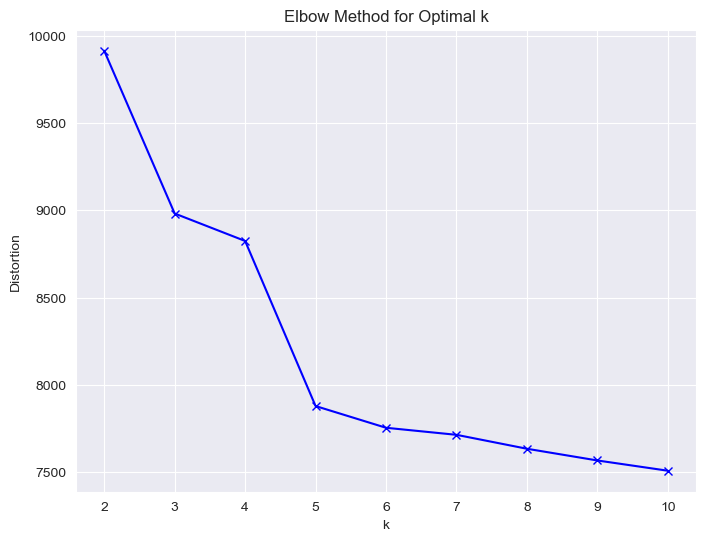

In [9]:
# Step 2: K-means clustering
def optimal_k_means(X):
    distortions = []
    K = range(2, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)

    # Elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

optimal_k_means(X)

# Based on the elbow plot, you can choose the optimal number of clusters, say k=4
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
cleaned_df['kmeans_cluster'] = kmeans.labels_

In [10]:
# Step 3: LDA Topic Modeling
# Convert text into tokens
texts_tokens = [text.split() for text in texts]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts_tokens)

# Convert document into the bag-of-words (BoW) format
corpus = [dictionary.doc2bow(text) for text in texts_tokens]

# LDA model
lda_model = LdaModel(corpus, num_topics=4, id2word=dictionary, passes=10)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.027*"PayPayTEMU" + 0.019*"TEMU" + 0.016*"temu" + 0.008*"FUCK" + 0.007*"OFF"')
(1, '0.060*"my" + 0.036*"to" + 0.030*"accept" + 0.026*"free" + 0.021*"in"')
(2, '0.018*"de" + 0.013*"Temu" + 0.011*"temu" + 0.008*"y" + 0.007*"que"')
(3, '0.029*"Temu" + 0.027*"the" + 0.021*"to" + 0.020*"a" + 0.020*"and"')


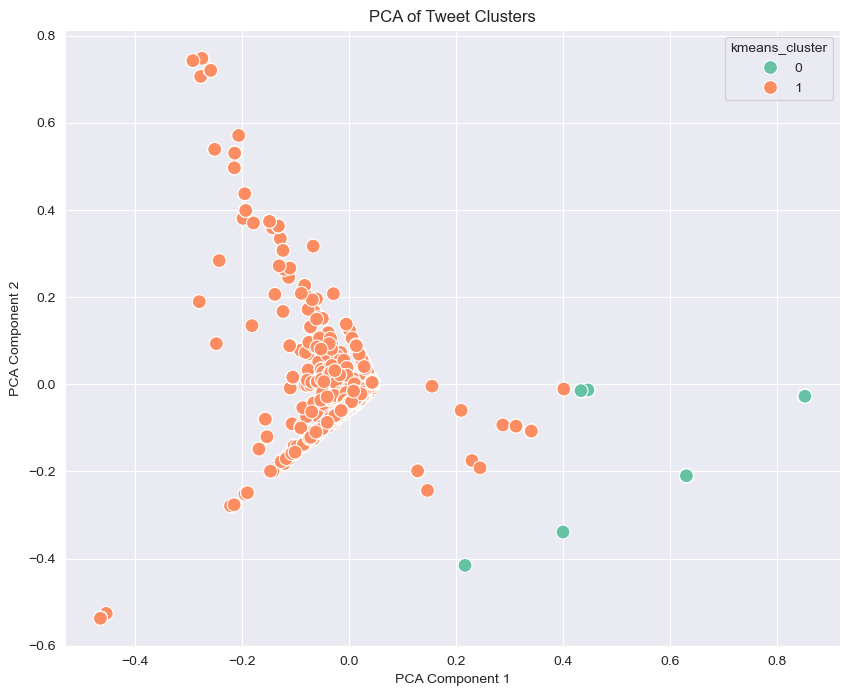

Silhouette Score for k-means clustering: 0.1332846780473374


In [11]:
# Step 4: Visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cleaned_df['kmeans_cluster'], palette="Set2", s=100)
plt.title('PCA of Tweet Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Optional: Silhouette Score for K-means
sil_score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score for k-means clustering: {sil_score}')
